In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

In [2]:
df = pd.read_excel('Yelp_Update_Cleaned_5_20.xlsx')

In [3]:
southzips = [78704, 78749, 78745, 78748, 78741,78744]
northzips = [78730,78731,78732,78734,78613,78727,78758,78753,78751,78757,78701,78703,78705,78756,78759,78750,78728,78712]
eastzips = [78702,78721,78723,78742,78722,78752,78719,78724]
westzips = [78746,78733,78735]
popzips = [78746,78722,78723,78613,78701,78705,78759]

total_zips = [southzips,northzips,eastzips,westzips,popzips]

In [4]:
charlies_words=[' Sandwiches', ' Bagels',' Breakfast & Brunch']  #changed to Charlie's specific categories
names = ['South','North','East','West','Popular']
graph_df = pd.DataFrame(columns=['Area','Category','Count'])


for i in total_zips:

    temp_df = df[df['postal_code'].isin(i)]

    words = []
    inner_count=0

    while inner_count < len(temp_df): 
        words.extend(temp_df.iloc[inner_count]['categories'].split(','))
        inner_count+=1
        
    words = [i for i in words if i in charlies_words]  #modify words list to only include category words above
    temp_list = Counter(words).most_common(3)  
    print(f'The category distribution in the {names[total_zips.index(i)]} zip codes of Austin are: {temp_list}\n')
    
   
    for item in temp_list:
        graph_df=graph_df.append({'Area':names[total_zips.index(i)],'Category':temp_list[temp_list.index(item)][0],
                        'Count':temp_list[temp_list.index(item)][1]},ignore_index=True)

The category distribution in the South zip codes of Austin are: [(' Breakfast & Brunch', 78), (' Sandwiches', 44), (' Bagels', 3)]

The category distribution in the North zip codes of Austin are: [(' Breakfast & Brunch', 147), (' Sandwiches', 108), (' Bagels', 10)]

The category distribution in the East zip codes of Austin are: [(' Breakfast & Brunch', 55), (' Sandwiches', 42), (' Bagels', 1)]

The category distribution in the West zip codes of Austin are: [(' Sandwiches', 12), (' Breakfast & Brunch', 12)]

The category distribution in the Popular zip codes of Austin are: [(' Breakfast & Brunch', 87), (' Sandwiches', 64), (' Bagels', 4)]



In [5]:
graph_df

,Area,Category,Count
0,South,Breakfast & Brunch,78
1,South,Sandwiches,44
2,South,Bagels,3
3,North,Breakfast & Brunch,147
4,North,Sandwiches,108
5,North,Bagels,10
6,East,Breakfast & Brunch,55
7,East,Sandwiches,42
8,East,Bagels,1
9,West,Sandwiches,12


Text(0.5,1,'NC Categories across Geographic Areas')

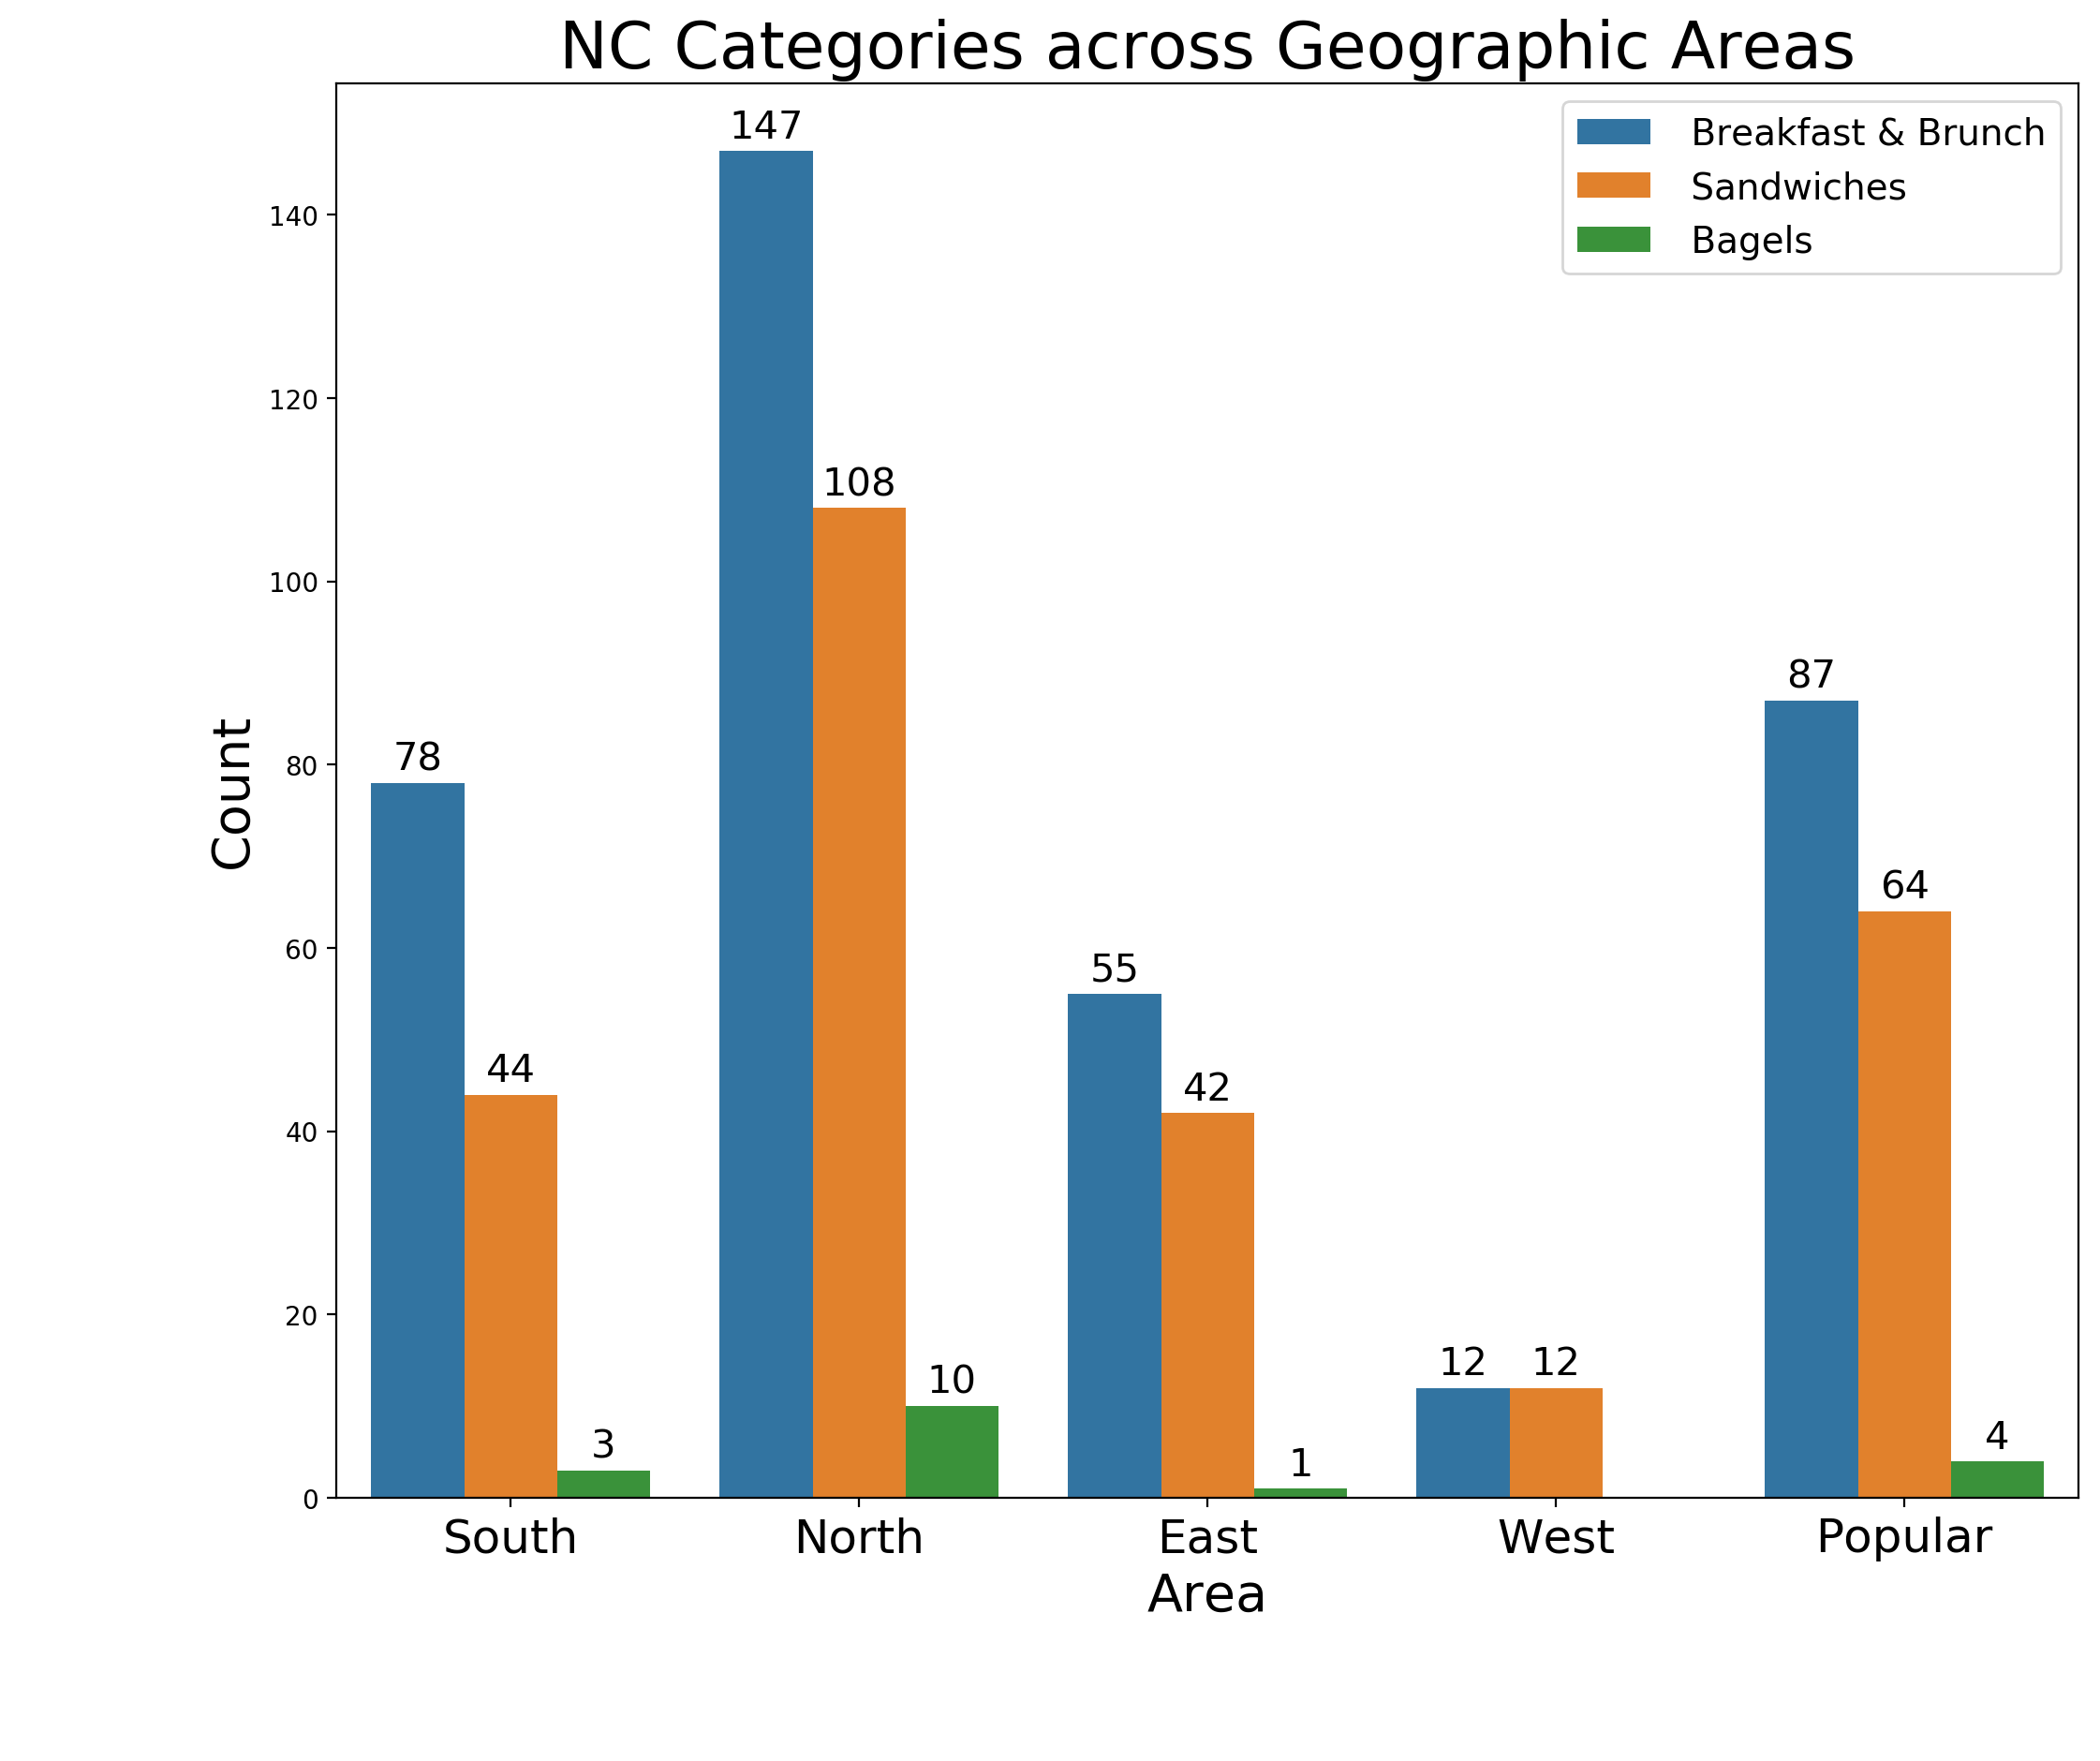

In [6]:
plt.figure(figsize=(12,10),dpi=200)
chart = sns.barplot(data=graph_df,x='Area',y='Count',hue='Category')

for p in chart.patches:
    chart.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width()/2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.legend(loc='upper right',prop={'size': 14})

chart.set_xticklabels(chart.get_xmajorticklabels(), fontsize = 18)
chart.set_xlabel(chart.get_xlabel(), fontsize = 20)
chart.set_ylabel(chart.get_ylabel(), fontsize = 20)


plt.title('NC Categories across Geographic Areas', fontsize = 25)



#annotate parameters: '.Of' = no decimal/no float --> '.1f', rounded to 1 decimal...etc

In [7]:
#initial draft for bar chart comparison; problems: decimal point in count #

'''
plt.figure(figsize=(12,10),dpi=200)
chart = sns.barplot(data=graph_df,x='Area',y='Count',hue='Category')
chart.set_xticklabels(chart.get_xticklabels(), horizontalalignment='right',size=15)
chart.set_yticklabels(chart.get_yticks(), size = 15)

chart.set_xlabel('Area',size=15)

plt.legend(loc='upper right',title='Categories')
plt.title("Nervous Charlie's Top 3 Categories across Austin Geographic Areas",fontsize=25)
sns.set(font_scale = 1.2)


    
#https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
#running through each row and its corresponding value 
'''

'\nplt.figure(figsize=(12,10),dpi=200)\nchart = sns.barplot(data=graph_df,x=\'Area\',y=\'Count\',hue=\'Category\')\nchart.set_xticklabels(chart.get_xticklabels(), horizontalalignment=\'right\',size=15)\nchart.set_yticklabels(chart.get_yticks(), size = 15)\n\nchart.set_xlabel(\'Area\',size=15)\n\nplt.legend(loc=\'upper right\',title=\'Categories\')\nplt.title("Nervous Charlie\'s Top 3 Categories across Austin Geographic Areas",fontsize=25)\nsns.set(font_scale = 1.2)\n\n\n    \n#https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/\n#running through each row and its corresponding value \n'

In [8]:
#len(df[df['categories'].str.contains('Bagels',na=False)])
#4 bagel shops in ALL of AUSTIN are NOT included b/c they weren't put into the zip code areas defined above

In [9]:
#df[df['categories'].str.contains('Bagels',na=False)]['postal_code'].value_counts()
#78705 is directly to the SE of 78751 (current zip)
#31/46 is 1 zip code between 51
#49/59 is too far 

southzips = [78704, 78749, 78745, 78748, 78741,78744]

In [10]:
#df[df['categories'].str.contains('Bagels',na=False) & (df['postal_code']==78751)]

In [11]:
bagels_df = df[df['categories'].str.contains('Bagels',na=False)]

In [12]:
#bagels_multi = bagels_df.groupby(by=['postal_code','stars','review_count'])

In [13]:
#bagels_multi

In [14]:
#bagels_df.sort_values(['postal_code','stars','review_count'])

In [15]:
#bagels_df.sort_values('review_count',ascending=False)

In [16]:
#pd.set_option('display.max_colwidth', None)
#bagels_df[bagels_df['name']=="Nervous Charlie's"]['date']